# Does Our AI Model Disciminate?

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71,male,Associate,46817.176426,3,RENT,11567.737650,MEDICAL,10.351469,0.247083,5,806.869094,No,0
1,34,male,High School,79093.494008,17,OWN,9519.674498,MEDICAL,11.168902,0.120360,1,604.330171,No,0
2,80,male,Associate,67819.614431,20,OWN,16226.604002,PERSONAL,12.293112,0.239261,11,685.933579,No,0
3,40,female,Associate,49599.861220,0,RENT,15641.221708,VENTURE,10.327926,0.315348,14,629.190150,No,0
4,43,male,Doctorate,99833.900180,8,OWN,12727.942517,EDUCATION,9.338069,0.127491,16,638.298168,No,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  float64
 12  previous_loan_defaults_on_file  

<Axes: title={'center': 'Proportions of Male and Female Customers'}, ylabel='count'>

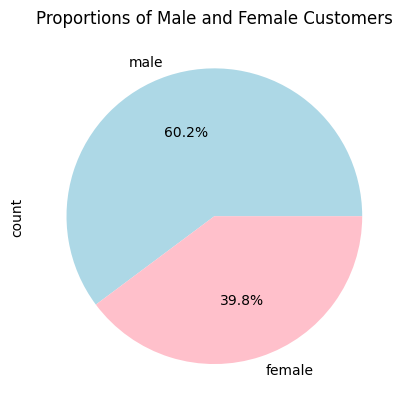

In [9]:
gender_count = df['person_gender'].value_counts()
gender_count.plot(kind='pie', colors=['lightblue', 'pink'], autopct='%1.1f%%', title='Proportions of Male and Female Customers')

**This should be around the percentage we see going forward for loan approvals.**

<Axes: title={'center': 'Proportions of Male and Female Customers With Approved Loans'}, ylabel='count'>

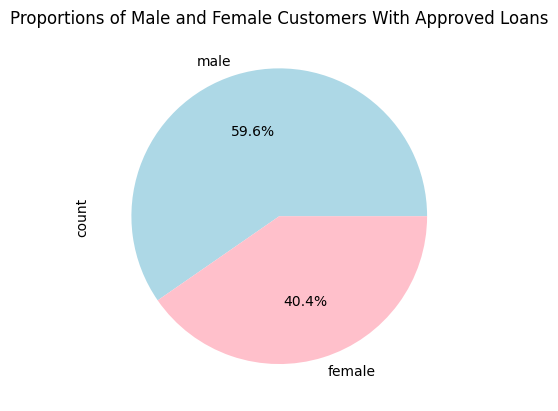

In [4]:
loanApproved_customers = df.loc[(df['loan_status'] == 1)]
loanApproved_byGender = loanApproved_customers['person_gender'].value_counts()
loanApproved_byGender.plot(kind='pie', colors=['lightblue', 'pink'], autopct='%1.1f%%', title='Proportions of Male and Female Customers With Approved Loans')

**Ok, so we are not really seeing much in terms of discrimination. The numbers are not that far off to cause any concern.**

**One last test. We will create a stacked bar chart that displays the loans approved for male and female. But wait, that would not give us an accurate picture. Becuase what if most of the woman have bad credit score, or most of the men have previous loan defaults. We want to organize customers based on their credit score. We will create bins with ranges and stack the count of men and female approve counts that fall in that credit range.**

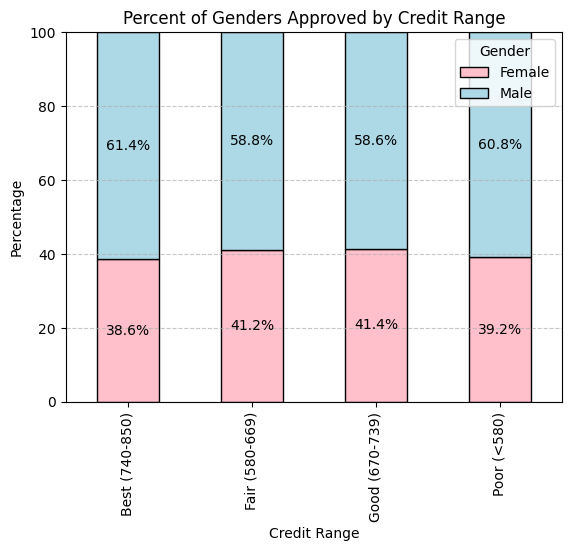

In [10]:
# Poor Credit
loanApproved_customers.loc[((df['credit_score'] < 580)), 'CreditRange'] = 'Poor (<580)'
# Fair Credit
loanApproved_customers.loc[((df['credit_score'] >= 580) & (df['credit_score'] <= 669)), 'CreditRange'] = 'Fair (580-669)'
# Good Credit
loanApproved_customers.loc[((df['credit_score'] >= 670) & (df['credit_score'] <= 739)), 'CreditRange'] = 'Good (670-739)'
# Best Credit
loanApproved_customers.loc[((df['credit_score'] >= 740) & (df['credit_score'] <= 850)), 'CreditRange'] = 'Best (740-850)'

creditRange_byGender = loanApproved_customers.groupby(['CreditRange', 'person_gender']).size().unstack()
creditRange_byGender_percent = creditRange_byGender.div(creditRange_byGender.sum(axis=1), axis=0) * 100

ax = creditRange_byGender_percent.plot(kind='bar', stacked=True, title='Percent of Genders Approved by Credit Range', color=['pink', 'lightblue'], edgecolor='black', ylabel='Percentage', xlabel='Credit Range')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(0, 100)
ax.legend(['Female', 'Male'], title='Gender')

**So even in all credit ranges, we find that the percentages are around the same from approved loans by gender. The slight differences most likely are from other factors that would determine for a approved loan or not. So from the data we see no discrimination by sex. Next, let's move onto the age of our customers and see if there is any discimination going on. We will do roughly the same process again to figure this out.**

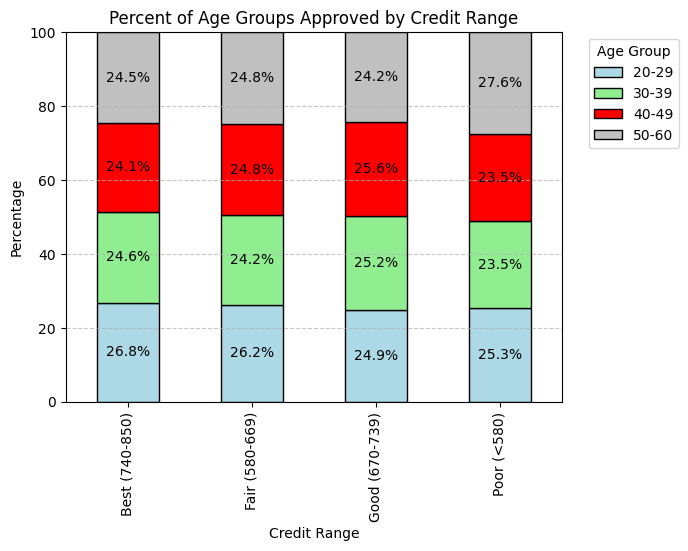

In [11]:
# 20 - 29 years
loanApproved_customers.loc[((df['person_age'] >= 20) & (df['person_age'] <= 29)), 'AgeGroup'] = '20-29'
# 30 - 39 years
loanApproved_customers.loc[((df['person_age'] >= 30) & (df['person_age'] <= 39)), 'AgeGroup'] = '30-39'
# 40 - 49 years
loanApproved_customers.loc[((df['person_age'] >= 40) & (df['person_age'] <= 49)), 'AgeGroup'] = '40-49'
# 50 - 60 years
loanApproved_customers.loc[((df['person_age'] >= 50) & (df['person_age'] <= 60)), 'AgeGroup'] = '50-60'

creditRange_byAge = loanApproved_customers.groupby(['CreditRange', 'AgeGroup']).size().unstack()
creditRange_byAge_percent = creditRange_byAge.div(creditRange_byAge.sum(axis=1), axis=0) * 100

age_order = ['20-29', '30-39', '40-49', '50-60']
creditRange_byAge_percent = creditRange_byAge_percent[age_order]

ax = creditRange_byAge_percent.plot(kind='bar', stacked=True, title='Percent of Age Groups Approved by Credit Range', color=['lightblue', 'lightgreen', 'red', 'silver'], edgecolor='black', ylabel='Percentage', xlabel='Credit Range')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(0, 100)
ax.legend(age_order, title='Age Group', loc='upper right', bbox_to_anchor=(1.25, 1))

**We can see from this chart that the approved loans for age groups is pretty much equaly distributed across the board. The slight differences are othe variables that would determine whether someone gets approved or not. Let's create a chart to put customers who have default loans on file compared to those who don't and see how many have their loans accepted.**

<Axes: title={'center': 'Number of Approved Loans Based on Previous Loan Default'}, xlabel='Previous Loan Default On File', ylabel='# of Customers'>

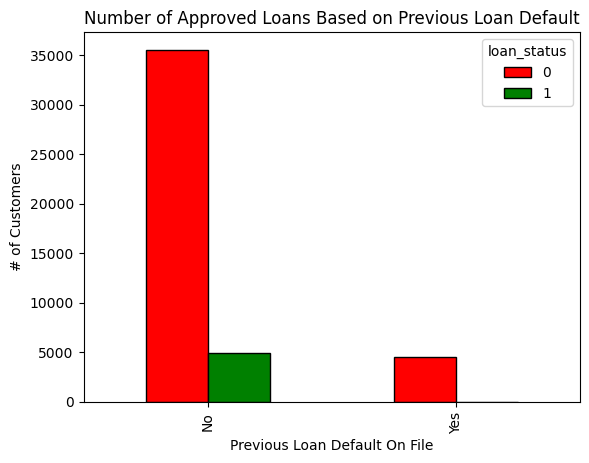

In [7]:
defaults_data = df.groupby(['previous_loan_defaults_on_file','loan_status']).size().unstack()

defaults_data.plot(kind='bar', title='Number of Approved Loans Based on Previous Loan Default', color=['red', 'green'], edgecolor='black', ylabel='# of Customers', xlabel='Previous Loan Default On File')

**This is great for proving the AI model is doing it's job. Customers who do have a 'previous loan default on file' are getting rejected 100%. Customers who don't are getting some acceptance, but alot of rejection. There may be a problem here. There are many variables to why they are being rejected outside of whether they have a yes or a no. Next let's compare the relationship between our customers credit ranges and how many loans are accepted. We will create a clustered bar chart that repesents this relationship.**

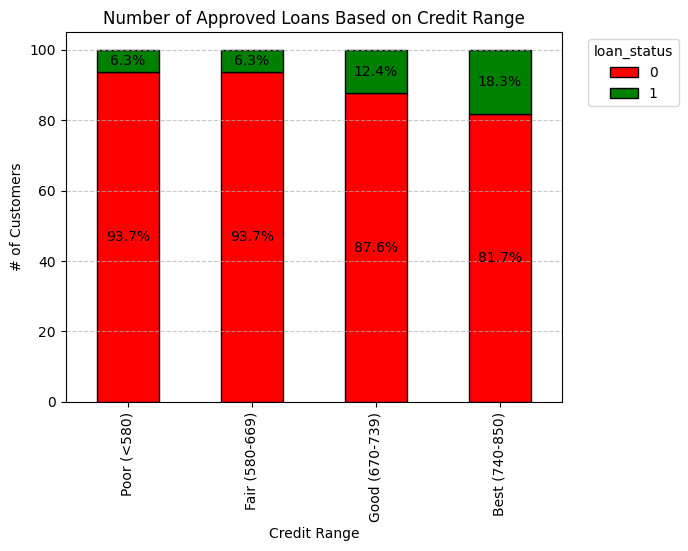

In [15]:
# Poor Credit
df.loc[((df['credit_score'] < 580)), 'CreditRange'] = 'Poor (<580)'
# Fair Credit
df.loc[((df['credit_score'] >= 580) & (df['credit_score'] <= 669)), 'CreditRange'] = 'Fair (580-669)'
# Good Credit
df.loc[((df['credit_score'] >= 670) & (df['credit_score'] <= 739)), 'CreditRange'] = 'Good (670-739)'
# Best Credit
df.loc[((df['credit_score'] >= 740) & (df['credit_score'] <= 850)), 'CreditRange'] = 'Best (740-850)'

approvedLoans_byCreditRange = df.groupby(['CreditRange','loan_status']).size().unstack()
approvedLoans_byCreditRange = approvedLoans_byCreditRange.div(approvedLoans_byCreditRange.sum(axis=1), axis=0) * 100

category_order = ['Poor (<580)', 'Fair (580-669)', 'Good (670-739)', 'Best (740-850)']
approvedLoans_byCreditRange = approvedLoans_byCreditRange.reindex(category_order)

ax = approvedLoans_byCreditRange.plot(kind='bar', stacked=True, title='Number of Approved Loans Based on Credit Range', color=['red', 'green'], edgecolor='black', ylabel='# of Customers', xlabel='Credit Range')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.legend(title='loan_status', loc='upper right', bbox_to_anchor=(1.25, 1))

**This shows the AI model is doing well recognizing the relationship between good credit score and accepting a loan. As the credit ranges get better, the loan acceptance rate goes up. The chart also shows that the financial institution is low-risk when it comes to accepting loans. Majority of loans, even with good credit scores, are still being rejected.**

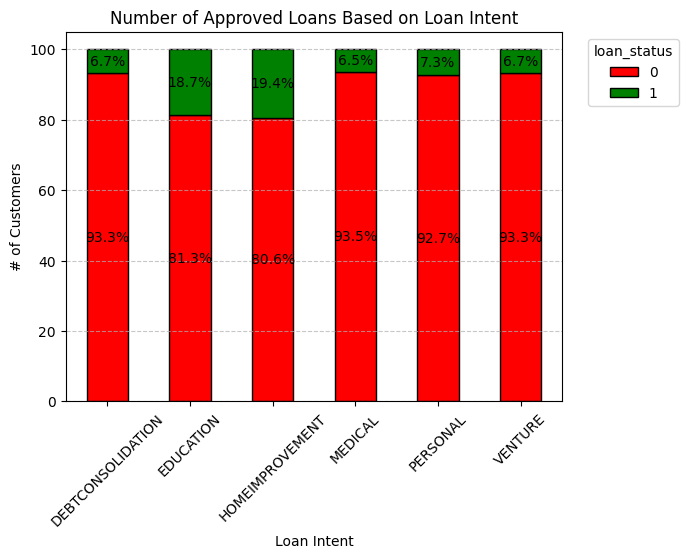

In [27]:
loanIntent_data = df.groupby(['loan_intent','loan_status']).size().unstack()
loanIntent_data = loanIntent_data.div(loanIntent_data.sum(axis=1), axis=0) * 100

ax = loanIntent_data.plot(kind='bar', stacked=True, title='Number of Approved Loans Based on Loan Intent', color=['red', 'green'], edgecolor='black', ylabel='# of Customers', xlabel='Loan Intent')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

ax.tick_params(axis='x', labelrotation=45)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.legend(title='loan_status', loc='upper right', bbox_to_anchor=(1.25, 1))

**As we can see, it looks like the bank considers education and homeimprovement to be safer options to accepts loans for. All categories have a higher rejection rate but this just reinforces even more that the bank has a low-risk tolerance. Now let's create a bar chart that illustrates the relationship between the customers home ownership and their loan approval/rejection.**

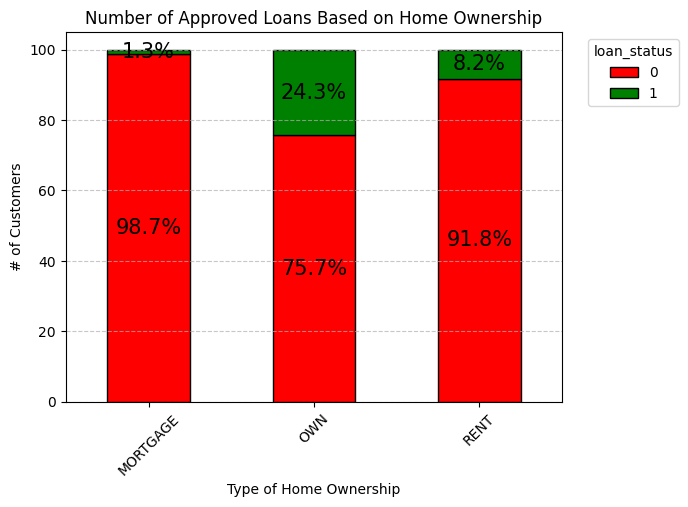

In [45]:
customer_home_ownership_data = df.groupby(['person_home_ownership','loan_status']).size().unstack()
customer_home_ownership_data = customer_home_ownership_data.div(customer_home_ownership_data.sum(axis=1), axis=0) * 100

ax = customer_home_ownership_data.plot(kind='bar', stacked=True, title='Number of Approved Loans Based on Home Ownership', color=['red', 'green'], edgecolor='black', ylabel='# of Customers', xlabel='Type of Home Ownership')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=15)

ax.tick_params(axis='x', labelrotation=45)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.legend(title='loan_status', loc='upper right', bbox_to_anchor=(1.25, 1))

**The AI model is working correctly in this section. If the customer already has a mortgage loan, then it only makes sense to be skeptical on approving another loan. Which is why we see a 1.3% acceptance rate. If the customer owns a house and is not paying a mortgage, then we are more likely to approve the loan. And in between the 2 options, if the customer is renting then we may approve depending on if other variables are suitable for acceptance. Let's now create a chart that pits employment experience against loan approval and see if we can visualize a relationship between the two.**

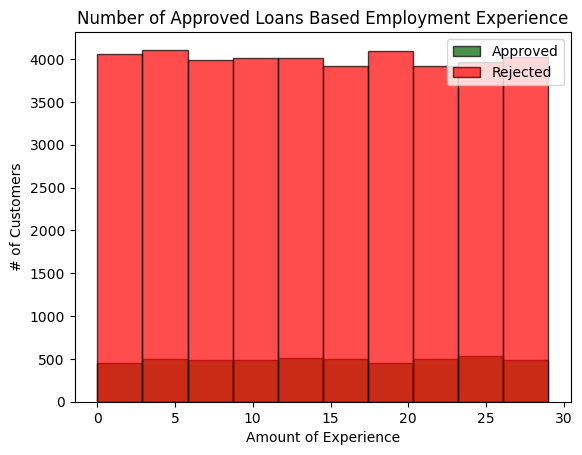

In [94]:
approved_exp = df['person_emp_exp'].loc[(df['loan_status'] == 1)]
rejected_exp = df['person_emp_exp'].loc[(df['loan_status'] == 0)]

fig, ax = plt.subplots()

approved_exp.plot(kind='hist', ax=ax, label='Approved', color='darkgreen', edgecolor='black', alpha=0.7)
rejected_exp.plot(kind='hist', ax=ax, label='Rejected', color='red', edgecolor='black', alpha=0.7)

ax.set(xlabel='Amount of Experience', ylabel='# of Customers', title='Number of Approved Loans Based Employment Experience')
ax.legend()

**The banks low-risk tolerance shows once again. The amount of experience does not have a relationship with your loan being approved or not. Across the board the values are mainly all the same. This tells us that the AI model is not discriminating based off of work experience.**

## 1. Which features seem to drive the model's decision?
### Based on our charts, the model's decisions are clearly driven by financially relevant factors:

**credit_score:** This is a primary driver. Our stacked percentage bar chart showed a direct, positive correlation: as the credit range improved from 'Poor' to 'Best', the green 'Approved' (1) section of the bar grew larger.

**previous_loan_defaults_on_file:** This is another very strong driver. Our grouped bar chart showed that applicants with a 'Yes' (Y) for a previous default were almost 100% rejected, while those with 'No' (N) were the only group to receive approvals.

**person_home_ownership:** This is a clear driver. The stacked percentage chart showed the model heavily favors 'Own' (highest approval rate) over 'Rent' (medium rate) and 'Mortgage' (lowest rate), which is a logical risk calculation.

**loan_intent:** This is a more subtle, but still clear, driver. The percentage chart showed that "safer" intents like 'EDUCATION' and 'HOMEIMPROVEMENT' had a visibly higher approval rate than others, like 'VENTURE'.

## 2. Which features seem unrelated?
### Our analysis showed that several features had no meaningful relationship with the loan decision:

**person_gender & person_age:** These were the most important to check. Our stacked percentage charts—which controlled for credit score—showed that within each credit range, the approvals were split almost equally between genders and distributed evenly across all age groups.

**person_emp_exp:** Our overlapping histograms for 'Approved' and 'Rejected' applicants were nearly identical in shape and position. This shows that an applicant's years of experience did not influence the model's decision.

## 3. Should the institution be concerned about potential legal trouble?

### No, the institution should not be concerned about legal trouble regarding age and sex.

The core of our justification comes from those specific visualizations. We created stacked percentage bar charts that isolated person_age and person_gender within specific credit ranges. These charts provide strong evidence that the model is not using these protected attributes to make decisions.

The model is discriminating, but it is doing so based on financially relevant, legally defensible factors (like credit_score and previous_loan_defaults_on_file), which is exactly what a loan model is supposed to do.